<a href="https://colab.research.google.com/github/Handrum/ML_Equipo_6/blob/main/A3b_DL_TC5033_AD2023_text_classifier_1_with_50_Equipo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

# **Master's in Applied Artificial Intelligence**
## **Course: Advanced Machine Learning Methods**
* ### **Lead Instructor**: José Antonio Cantoral Ceballos
* **Tutor**: Ana Bricia Galindo

## **Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch**

*   --> Rafael Alexis Pinto Flórez | A01794500
*   --> Julio Baltazar Colín | A01794476
*   --> José Santiago Rueda Antonio | A01794118
*   --> Helmy Andrea Moreno Navarro | A01793918

## **TC 5033**
# **Word Embeddings**

<br>

#### **Activity 3b:** Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

**- Objective**:
   - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
   - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
   - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- **Instructions**:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- **Evaluation Criteria**:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


**Dataset**

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


**Some knowledge of the AG NEWS Corpus**

For us it is very important where the data comes from, therefore, we have prepared through a few brief articles to capture them in the following exercise, in order to analyze them not only from the code but also from their origin:

>*AG News (AG’s News Corpus) is a subdataset of AG's corpus of news articles constructed by assembling titles and description fields of articles from the 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”) of AG’s Corpus. The AG News contains 30,000 training and 1,900 test samples per class.* [1]

**Some data**

- Número de líneas por división:
  > **tren**: 120000
  
  > **prueba**: 7600

This paper explores the use of character-level convolutional networks (ConvNets) for text classification, demonstrating their effectiveness against conventional and deep learning models, such as word-based ConvNets and recurrent neural networks. Extensive datasets were used to support the research. [2]

 >*AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004.
The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non - commercial activity.* [3]





## **Objective**

- The effectiveness of the following text classification modeelos exercise using RNNs in PyTorch with the AG_NEWS dataset will be a great challenge, since it will require implementing only the Pytorch library and adjusting the hyperparameters that will lead us to meet the evaluation criteria.

# **Use Import libraries**

Simpler description of the imported libraries:** ** 1.

1. **Numpy (aka np)**: Used to do math and work with numbers in Python.

2. **Torch**: Important for building and training neural networks, such as those used in deep learning.

3. **AG_NEWS from torchtext.datasets**: Contains news that are used to train models that can classify them.

4. **DataLoader from torch.utils.data**: Used to load data in an organized way, especially useful for training models.

5. **Random_split from torch.utils.data.dataset:** Divides data into training and test groups to evaluate models.

6. **Get_tokenizer from torchtext.data.utils**: Splits text into words so that computers can understand it better.

7. **Build_vocab_from_iterator from torchtext.vocab**: Helps to create a dictionary of words from text.

8. **To_map_style_dataset from torchtext.data.functional:** Converts data so that it can be used by deep learning models.

9. **nn from torch**: Used to build neural networks and train them.

10. **F from torch.nn**: Contains important functions for neural networks.

11. **Scikitplot (aka skplt)**: Helps create graphs and metrics to see how machine learning models work.

12. **gc**: Controls garbage in computer memory, which is useful for saving resources.

13. **Matplotlib.pyplot (aka plt)**: Used to create graphs and data visualizations.It is used to display information in a clearer way.

In [ ]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [ ]:
!pip install scikit-plot
!pip install 'portalocker>=2.0.0'


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc
import matplotlib.pyplot as plt

## **Use GPU if available**

This code allows a model to automatically choose between GPU and CPU based on GPU availability, improving portability by dynamically adapting to different hardware configurations. Performance optimization is achieved by accelerating computationally intensive tasks through automatic use of the GPU during deep learning model training.

In addition, ease of use is highlighted by making the code more accessible to users with no experience in hardware configurations, simplifying development and execution in diverse environments without the need for manual adjustments in device selection.

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## **Get the train and the test datasets and dataloaders**

## **Classes:**

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

## **We will convert them to:**

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

El siguiente código relaciona la carga y transformación de conjuntos de datos para nuestro modelo para implementar la función AG_NEWS() y to_map_style_dataset().

Dividiremos el conjunto de datos de AG_NEWS en conjuntos de entrenamiento y prueba utilizando la función AG_NEWS() y luego se transformarán en un formato específico llamado "map style" utilizando la función to_map_style_dataset().

In [ ]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

##**Tokeniser**

>Through this tokenizer we will provide a method **(yield_tokens())** to get text tokens using the tokenizer **'basic_english'**. You can use this generator function in a loop to get tokens from a dataset.

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

#**Build the vocabulary**

It is very important to build a vocabulary in an RNN model in order to manage and improve its efficiency, generalization capacity and ability to handle the complexity of the language. This would help us within the model to:

1. **Data Processing Efficiency
2. Complexity Reduction** **Complexity Reduction** 3.
3. 3. **Improved Generalization** 4.
4. **Management of Language Variability** 5.
5. **Reducing the Risk of Overfitting** 6.

>Finally, having a vocabulary defined in a **Recurrent Neural Network (RNN) model** simplifies its operation by focusing on a known set of words, **facilitating training and pattern understanding**. In addition, it helps us improve the generalization ability of the model by learning from a specific set of words, helps us manage language variations to better interpret the context, and reduces the risk of overfitting by preventing it from learning irrelevant patterns.

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

>El siguiente código realiza un procesamiento de texto utilizando una función de tokenización (tokeniser) y luego imprime los tokens resultantes junto con alguna información relacionada con el vocabulario (vocab) implementando las funciones **tokenizer y vocab**.

In [ ]:
#test tokens
tokens = tokeniser('Welcome to TE3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'te3007'] [3314, 4, 0]


# **Division of data**

- From the following code we will divide a data set into training and validation sets, reserving 90% of the data for training and 10% for validation. The lengths of the training, validation and test sets will be printed, your expected result will be : 108000 12000 7600



In [ ]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset)) #expected result 108000 12000 7600

108000 12000 7600


## **Batch of data**

> Once the **vocab and tokeniser** functions are defined, as well as the value of **max_tokens**, using the following function **(collate_batch)** it takes a batch of data, tokenizes the texts, adjusts their length and returns PyTorch tensors ready to be used in a machine learning model.

In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.long) - 1

The following parameters are configured for the data processing or text processing model. Defining the following variables.

- **Labels**: A list containing the labels "World", "Sports", "Business" and "Sci/Tech". This list represents the categories that pertain to the data provided by AG-NEWS.

- **max_tokens**: Specifies the maximum length allowed for a sequence of tokens, such as words or characters, in any particular context.

- **BATCH_SIZE**: Batch size when processing data in batches. Batch processing is where several samples are processed at once to improve computational efficiency.

In [ ]:
#parametres
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

# **DataLoaders**

**DataLoaders** are helpers that split the images into batches so that the model can learn more efficiently. Then, these helpers also help us measure how well the model performs on data it has not seen before.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

In [ ]:
# Create a train data loader
train_loader

# **Let us build our RNN model**



We will now explain the following hyperparameters of our model and what value they provide:

- **EMBEDDING_SIZE = 128:**

>In this parameter we indicate the size of the embedding vectors that will be used to represent each input element in your sequence. In this case, each element will be represented as a 128-dimensional vector.

- **NEURONS = 64:**

>In this case we specify that the hidden layer of the RNN will have 64 units (neurons). This hidden layer is where the network maintains and updates its internal state while processing the sequence.

- **LAYERS = 8:**

>This parameter indicates that we are using **an RNN with 8 layers**. Having multiple layers allows the model to learn **more complex** and **hierarchical representations of the data.** However, it is important to note that a larger number of layers can also increase complexity and **training time.

- **NUM_CLASSES = 4:** **

>This value indicates that our **model has 4 output classes.** In this context it means that we are working with a problem that predicts one of the four categories.

These values were chosen according to the specific nature of our data and the problem you are addressing.

However, several tests were performed before arriving at the highest accuracy of our final model, such as 128 for the embedding size and 8 layers for the RNN, which were the most appropriate based on the performance we observed in our dataset.

We experimented with changes in various hyperparameters and adjusted until we reached the appropriate one. As the processing lasted so long we could not adjust each of them, however we left some screen prints, according to the response of each model in the validation set, as a practice to improve the performance of the model.

In [ ]:
EMBEDDING_SIZE = 128
NEURONS = 64
LAYERS = 8 # Best accurracy with 8 layers for the RNN
NUM_CLASSES = 4

In [ ]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        self.rnn = nn.GRU(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)
        self.fc = nn.Linear(in_features=hidden, out_features=num_classes)

    def forward(self, x):
        embedded = self.embedding_layer(x)
        output, _ = self.rnn(embedded)
        return self.fc(output[:, -1, :])

In [ ]:
def accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
def train(model, optimizer, epochs=100):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}')



In [ ]:
epochs = 5
lr = 0.001 # Best accurracy with this learning rate

rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES).to(device)
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()



In [ ]:
train(rnn_model, optimizer=optimizer,  epochs=epochs)

Epoch [1/5], Loss: 281.7182
Epoch [2/5], Loss: 135.5196
Epoch [3/5], Loss: 100.3744
Epoch [4/5], Loss: 79.6512
Epoch [5/5], Loss: 64.0241


In [ ]:
print(f'{accuracy(rnn_model, test_loader):.4f}')

0.9057


In [ ]:
def sample_text(model, loader, num_samples=5):
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(loader):
            if i >= num_samples:
                break
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            print(f"Sample {i+1}:")
            print(f"Text: {' '.join(vocab.lookup_tokens(inputs[0].tolist()))}")
            print(f"True Label: {labels[0].item()} ({labels[0].item()+1})")
            print(f"Predicted Label: {predicted[0].item()} ({predicted[0].item()+1})")
            print("="*50)

In [ ]:
def sample_text(model, loader, num_samples=5):
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(loader):
            if i >= num_samples:
                break
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            print(f"Sample {i+1}:")
            print(f"Text: {' '.join(vocab.lookup_tokens(inputs[0].tolist()))}")
            print(f"True Label: {labels[0].item()} ({labels[0].item()+1})")
            print(f"Predicted Label: {predicted[0].item()} ({predicted[0].item()+1})")
            print("="*50)

In [ ]:

for i, (inputs, labels) in enumerate(test_loader):
  inputs, labels
  vocab.get_itos()

In [ ]:
vocab.get_itos()

['<unk>',
 '.',
 'the',
 ',',
 'to',
 'a',
 'of',
 'in',
 'and',
 's',
 'on',
 'for',
 '#39',
 '(',
 ')',
 '-',
 "'",
 'that',
 'with',
 'as',
 'at',
 'is',
 'its',
 'new',
 'by',
 'it',
 'said',
 'reuters',
 'has',
 'from',
 'an',
 'ap',
 'his',
 'will',
 'after',
 'was',
 'us',
 'be',
 'over',
 'have',
 'their',
 '&lt',
 'are',
 'up',
 'quot',
 'but',
 'more',
 'first',
 'two',
 'he',
 'world',
 'u',
 'this',
 '--',
 'company',
 'monday',
 'wednesday',
 'tuesday',
 'oil',
 'out',
 'thursday',
 'one',
 'not',
 'against',
 'inc',
 'friday',
 'into',
 'they',
 'about',
 'last',
 'iraq',
 'year',
 'than',
 'york',
 'yesterday',
 'who',
 'president',
 'microsoft',
 'no',
 'were',
 '?',
 'been',
 'million',
 't',
 'says',
 'week',
 'had',
 'corp',
 'united',
 'game',
 'when',
 'sunday',
 'prices',
 'could',
 'three',
 'would',
 'today',
 'years',
 'group',
 'security',
 'government',
 'time',
 'people',
 'which',
 'may',
 'afp',
 'percent',
 'software',
 '1',
 'win',
 'off',
 'team',
 'nex

In [ ]:
sample_text(rnn_model, test_loader)

Sample 1:
Text: safin clinches third paris masters paris ( reuters ) - marat safin won the paris masters for a record-equaling third time when he beat czech qualifier radek stepanek 6-3 7-6 6-3 on sunday . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
True Label: 1 (2)
Predicted Label: 1 (2)
Sample 2:
Text: pierce longs for old days rusty pierce has received lessons in pragmatism since joining the revolution four years ago . pierce has performed for teams that have inevitably turned to a direct , linear game , with little emphasis on creativity or imagination . the style paid off the last
True Label: 1 (2)
Predicted Label: 1 (2)
Sample 3:
Text: japanese joy and british tears it was the night of the longest race and the shortest , a night of distress for britain #39 s paula radcliffe and delight for america #39 s justin gatlin . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
True Label: 1 (2)
Predicte

In [ ]:
# create confusion matrix

def create_confusion_matrix(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)
    plt.show()



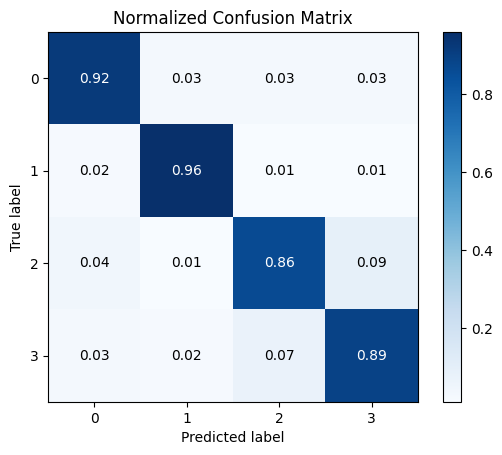

In [ ]:
# Llamada a la función para crear la matriz de confusión
create_confusion_matrix(rnn_model, test_loader)

#**BIBLIOGRAPHY**

[1]. AG News (AG’s News Corpus). Character-level Convolutional Networks for Text
Classification. https://paperswithcode.com/dataset/ag-news

[2] Xiang Zhang, Junbo Zhao, Yann LeCun. (2015, 4 de Sep)	arXiv:1509.01626 [cs.LG] Character-level Convolutional Networks for Text Classification. https://arxiv.org/abs/1509.01626

[3] AG's corpus of news articles. http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html

